## Data Import

In [22]:
import pandas as pd

# import data from data/ directory
df_train = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')

/tmp/ipykernel_3714/2879780261.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train.csv')


## Data overview

In [23]:
df_train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
792386,407,7,2013-07-21,0,0,0,0,0,0
369741,714,1,2014-08-11,3619,286,1,0,0,1
817444,935,6,2013-06-29,3392,346,1,0,0,0
117050,1091,6,2015-04-18,5898,512,1,0,0,0
164785,881,5,2015-03-06,4800,691,1,1,0,0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [25]:
# check for missing values
df_train.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

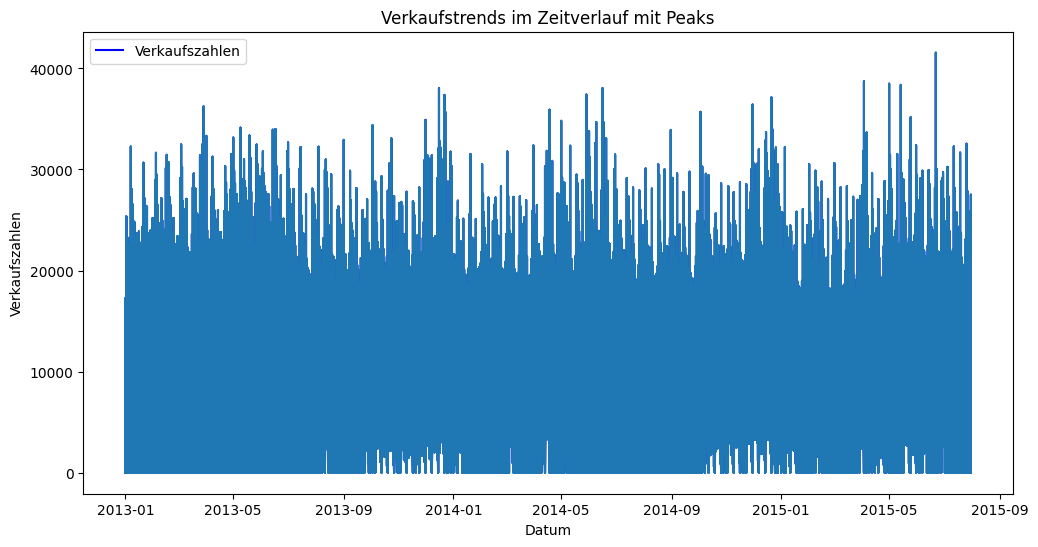

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Die Spalte 'Date' ist im datetime-Format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Verkaufstrends im Zeitverlauf plotten
plt.figure(figsize=(12, 6))
plt.plot(df_train['Date'], df_train['Sales'], label='Verkaufszahlen', color='blue')

# Peaks markieren
plt.plot(df_train['Date'], df_train['Sales'])

plt.title('Verkaufstrends im Zeitverlauf mit Peaks')
plt.xlabel('Datum')
plt.ylabel('Verkaufszahlen')
plt.legend()
plt.show()


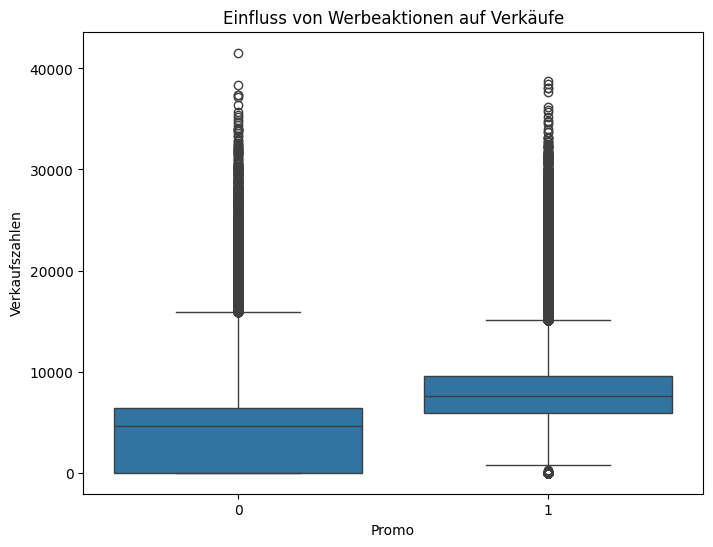

In [27]:
import seaborn as sns

# Boxplot zur Visualisierung des Einflusses von Werbeaktionen auf Verkäufe
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['Promo'], y=df_train['Sales'])
plt.title('Einfluss von Werbeaktionen auf Verkäufe')
plt.xlabel('Promo')
plt.ylabel('Verkaufszahlen')
plt.show()


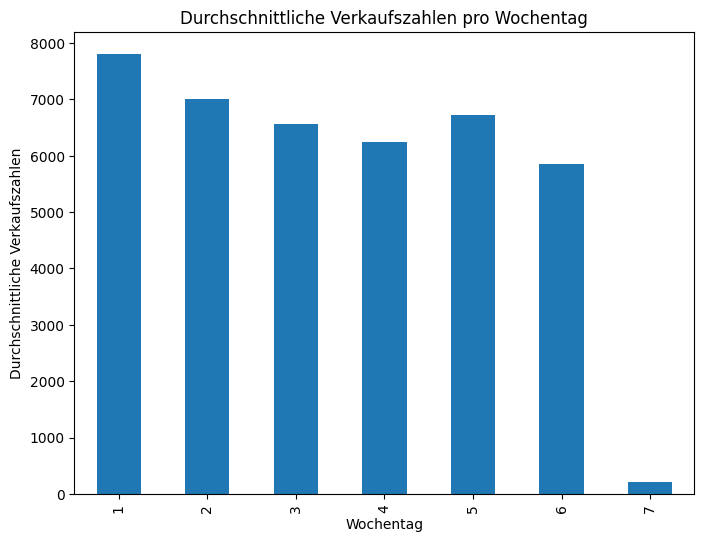

In [28]:
# Durchschnittliche Verkaufszahlen pro Wochentag
average_sales_per_day = df_train.groupby('DayOfWeek')['Sales'].mean()

# Balkendiagramm zur Visualisierung der durchschnittlichen Verkaufszahlen pro Wochentag
plt.figure(figsize=(8, 6))
average_sales_per_day.plot(kind='bar')
plt.title('Durchschnittliche Verkaufszahlen pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittliche Verkaufszahlen')
plt.show()


In [29]:
df_trainstore = pd.merge(df_train, df_store, on='Store')

df_trainstore

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [30]:
df_trainstore.dtypes


Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [31]:
df_trainstore['Month'] = df_trainstore['Date'].dt.month


In [32]:
df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [33]:
# import datetime
from datetime import datetime

# splitt date into day, month, year
df_trainstore['Day'] = df_trainstore['Date'].dt.day
df_trainstore['Month'] = df_trainstore['Date'].dt.month
df_trainstore['Year'] = df_trainstore['Date'].dt.year

# get week number with iso format
df_trainstore['Week'] = df_trainstore['Date'].dt.isocalendar().week
df_trainstore['Quarter'] = df_trainstore['Date'].dt.quarter

# remove date column
df_trainstore = df_trainstore.drop('Date', axis=1)

In [34]:
df_trainstore.sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Day,Year,Week,Quarter
711754,782,1,4798,506,1,0,0,1,c,c,...,2003.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",8,25,2014,35,3
161309,178,7,0,0,0,0,0,0,d,a,...,NaN,0,NaN,NaN,NaN,4,21,2013,16,2
984139,1079,6,6118,557,1,0,0,0,a,a,...,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct",3,22,2014,12,1
970489,1064,6,11095,1164,1,0,0,0,a,c,...,NaN,0,NaN,NaN,NaN,11,30,2013,48,4
691345,759,5,7804,856,1,1,0,0,a,a,...,2012.0,1,31.0,2013.0,"Feb,May,Aug,Nov",3,22,2013,12,1
302517,333,3,9949,1251,1,1,0,0,a,c,...,2010.0,0,NaN,NaN,NaN,11,12,2014,46,4
192993,213,5,6357,558,1,0,0,0,d,c,...,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct",4,19,2013,16,2
312050,343,7,0,0,0,0,0,0,d,a,...,2004.0,1,14.0,2014.0,"Jan,Apr,Jul,Oct",1,19,2014,3,1
323201,355,2,9039,1123,1,1,0,0,a,c,...,2013.0,0,NaN,NaN,NaN,6,18,2013,25,2
195684,216,5,6513,859,1,0,0,0,c,a,...,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",3,1,2013,9,1


In [35]:
# use one hot encoding for categorical variables
df_trainstore = pd.get_dummies(df_trainstore, columns=['StoreType', 'Assortment', 'StateHoliday'])

# convert dummies to int
df_trainstore = df_trainstore.astype({'StateHoliday_0': 'int', 'StateHoliday_a': 'int', 'StateHoliday_b': 'int', 'StateHoliday_c': 'int'})

# convert dummies storetype, assortment to int
df_trainstore = df_trainstore.astype({'StoreType_a': 'int', 'StoreType_b': 'int', 'StoreType_c': 'int', 'StoreType_d': 'int'})
df_trainstore = df_trainstore.astype({'Assortment_a': 'int', 'Assortment_b': 'int', 'Assortment_c': 'int'})

df_trainstore.sample()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
193173,214,4,8369,640,1,1,0,8650.0,7.0,2013.0,...,0,1,1,0,0,0,1,0,0,0


In [36]:
# map promo interval to numerical
promo_interval_map = {'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}
df_trainstore['PromoInterval'] = df_trainstore['PromoInterval'].map(promo_interval_map)

# if promo2 is 0 then promo2sinceweek, promo2sinceyear, promointerval are 0
df_trainstore['Promo2SinceWeek'] = df_trainstore['Promo2SinceWeek'].fillna(0)
df_trainstore['Promo2SinceYear'] = df_trainstore['Promo2SinceYear'].fillna(0)
df_trainstore['PromoInterval'] = df_trainstore['PromoInterval'].fillna(0)

df_trainstore.sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
16966,19,7,0,0,0,0,0,3240.0,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
462506,507,3,9582,674,1,1,0,9070.0,4.0,2011.0,...,0,0,0,0,1,0,1,0,0,0
73244,81,4,8519,689,1,1,0,2370.0,3.0,2011.0,...,0,0,1,0,0,0,1,0,0,0
479589,526,5,7544,1188,1,0,0,120.0,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
603334,662,3,6426,603,1,0,0,1070.0,NaN,NaN,...,0,1,1,0,0,0,1,0,0,0
72498,80,4,5581,487,1,0,0,7910.0,NaN,NaN,...,0,1,1,0,0,0,1,0,0,0
25670,28,1,8652,877,1,1,0,1200.0,10.0,2014.0,...,0,0,1,0,0,0,1,0,0,0
80434,88,1,4421,559,1,0,0,10690.0,10.0,2005.0,...,0,0,1,0,0,0,1,0,0,0
195930,217,1,5044,651,1,1,0,3150.0,NaN,NaN,...,1,0,1,0,0,0,1,0,0,0
894170,981,3,7324,769,1,1,0,2620.0,11.0,2002.0,...,0,1,0,0,1,0,1,0,0,0


In [37]:
# check for missing values
df_trainstore.isnull().sum()

# fill missing values with 0
df_trainstore.fillna(0, inplace=True)

df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
 13  PromoInterva

In [38]:
# df_trainstore['Date'] = pd.to_datetime(df_trainstore['Year'].astype(str) + '-' + df_trainstore['Month'].astype(str) + '-' + df_trainstore['Day'].astype(str))
# print(len(df_trainstore))


# # Sort the DataFrame by Store and Date
# df_trainstore = df_trainstore.sort_values(by=['Store', 'Date'])


# # Create a new DataFrame for the last 7 days for each store
# df_last7days = df_trainstore.groupby('Store').tail(7)

# # Create a new DataFrame with the sum of sales and customers for the last 7 days
# df_last7days_sum = df_last7days.groupby('Store').agg({
#     'Sales': 'sum',
#     'Customers': 'sum'
# }).reset_index()

# # Merge the sum data back into the original DataFrame
# df_trainstore = pd.merge(df_trainstore, df_last7days_sum, on='Store', how='left', suffixes=('', '_Last7Days'))

# # Create new columns
# df_trainstore['SalesPerCustomer'] = df_trainstore['Sales'] / df_trainstore['Customers']
# df_trainstore['SalesLastWeek'] = df_trainstore['Sales_Last7Days']
# df_trainstore['CustomersLastWeek'] = df_trainstore['Customers_Last7Days']


# print("len sales_last7days: ", df_trainstore['Sales_Last7Days'].isna().sum())
# print("len customers_last7days: ", df_trainstore['Customers_Last7Days'].isna().sum())
# print("count 0 values in customer last 7 days: ", df_trainstore[df_trainstore['Customers_Last7Days'] == 0].shape[0])

# df_trainstore['SalesPerCustomerLastWeek'] = df_trainstore['Sales_Last7Days'] / df_trainstore['Customers_Last7Days']

# print("len salespercustomerlastweek: ", df_trainstore['SalesPerCustomerLastWeek'].isna().sum())

# # Drop unnecessary columns
# df_trainstore = df_trainstore.drop(['Sales_Last7Days', 'Customers_Last7Days'], axis=1)

# # Print or view the updated DataFrame
# df_trainstore.sample()

In [39]:
# # if sales is 0 then sales per customer is 0
# df_trainstore['SalesPerCustomer'] = df_trainstore['SalesPerCustomer'].fillna(0)

# df_trainstore.info()

In [40]:
# # fill na values with 0 for sales per customer last week
# df_trainstore['SalesPerCustomerLastWeek'] = df_trainstore['SalesPerCustomerLastWeek'].fillna(0)

# df_trainstore.info()

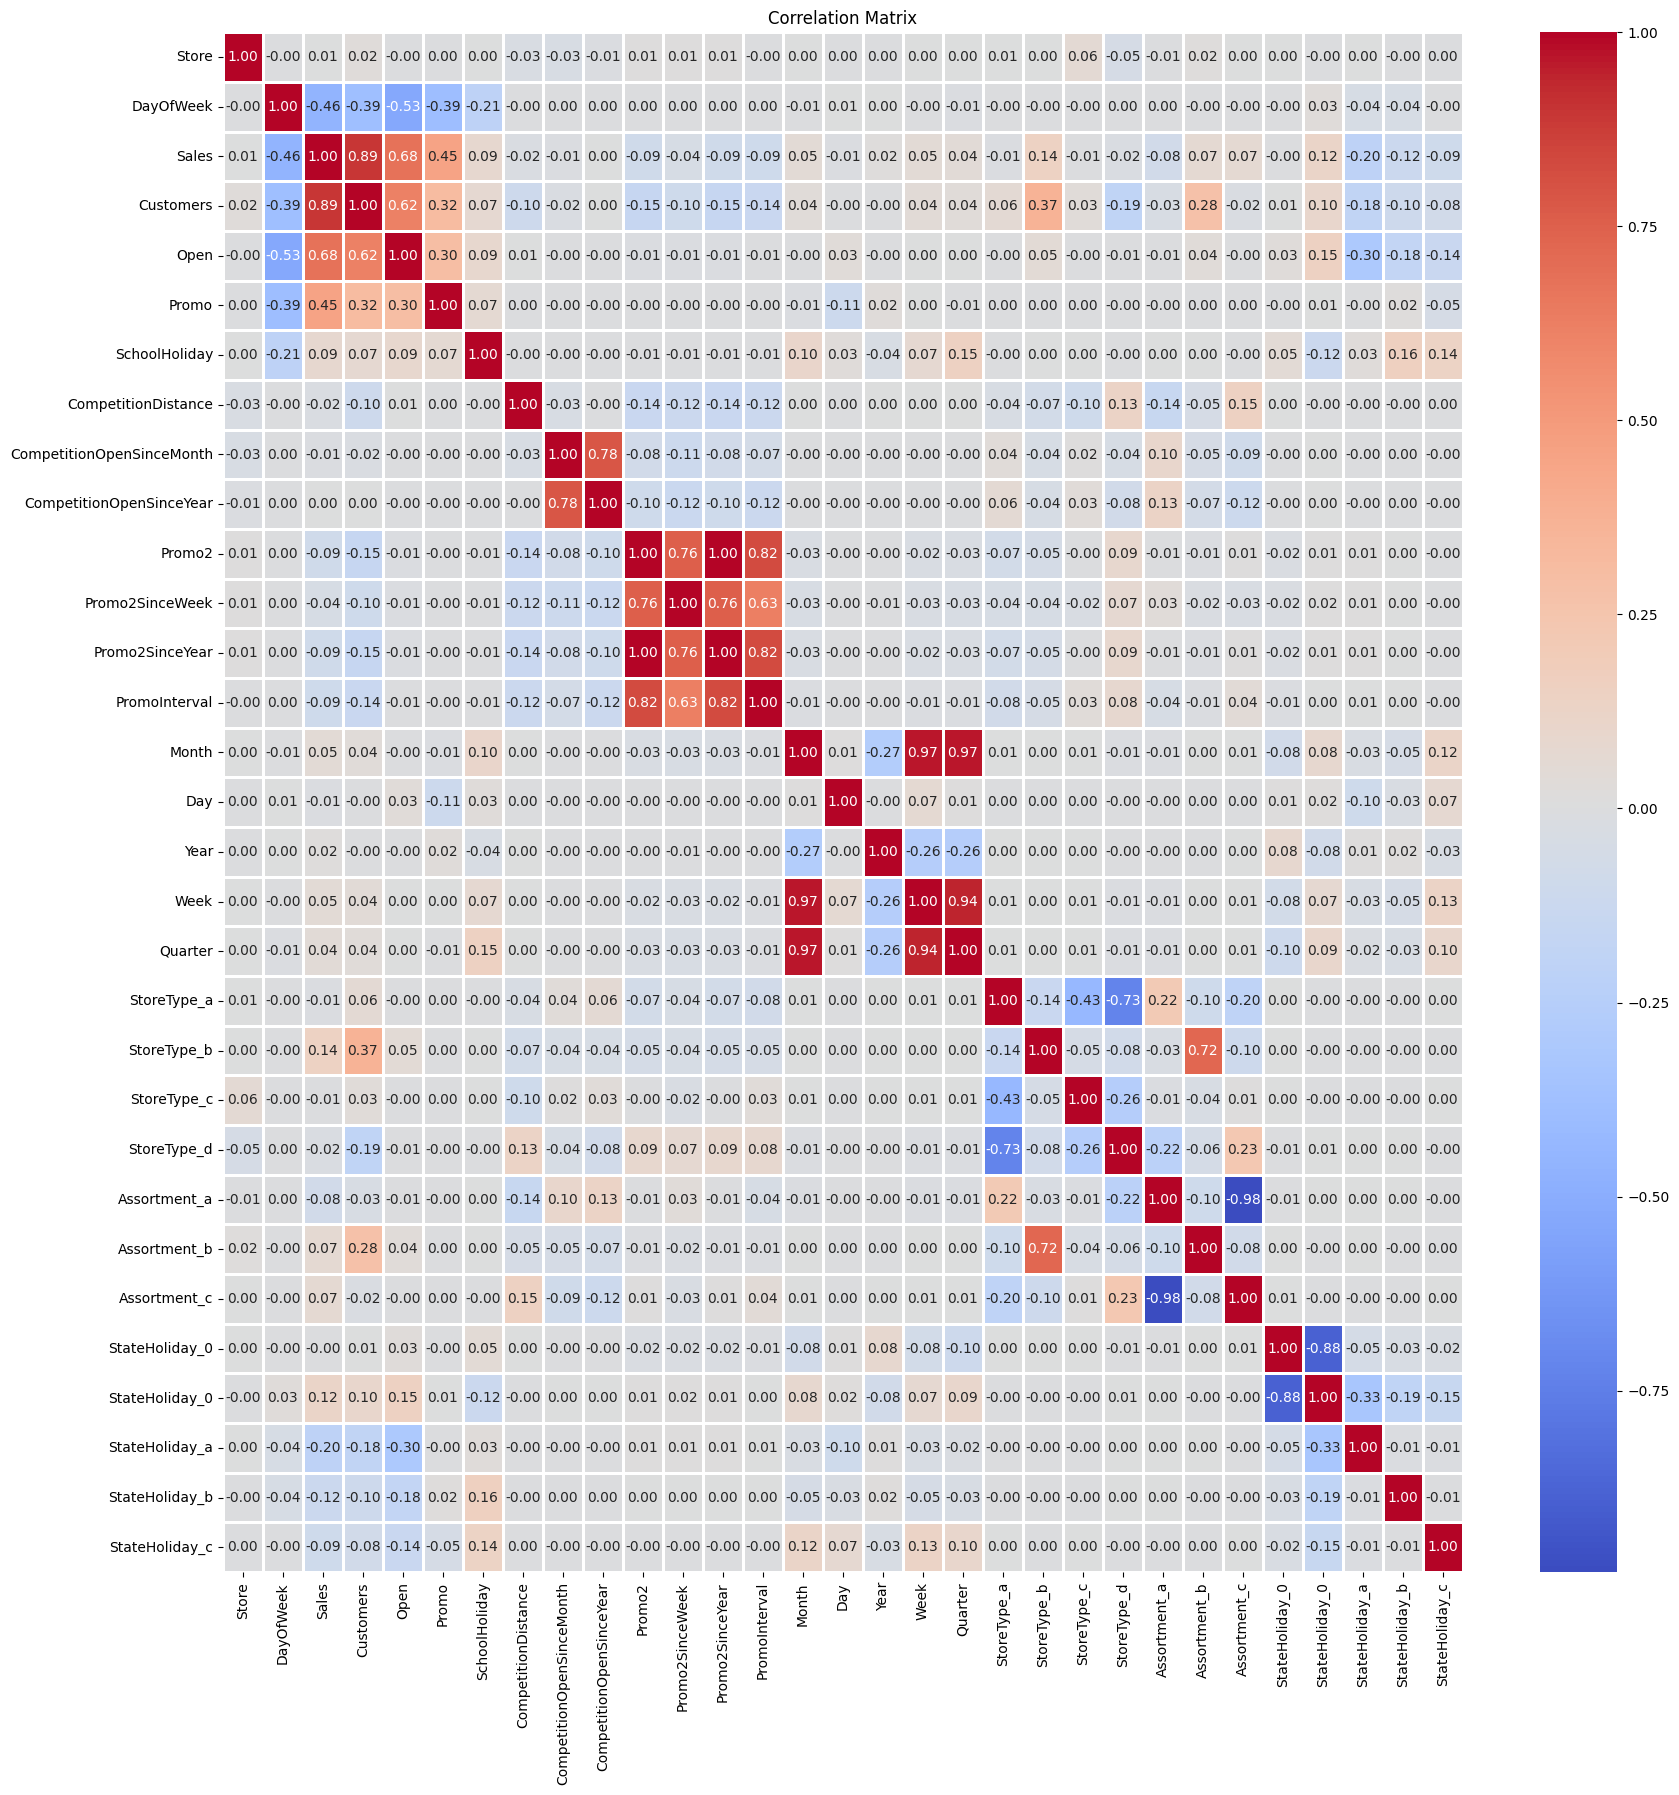

In [41]:
# plot correlation matrix
plt.figure(figsize=(20, 20))
correlation_matrix = df_trainstore.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

## Train Test Splitt

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

df_trainstore_frac = df_trainstore.sample(frac=0.005, random_state=42)

def split_data(df):
     X = df.drop('Sales', axis=1)
     y = df['Sales']
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_trainstore_frac)

## KNN

RMSPE:  inf


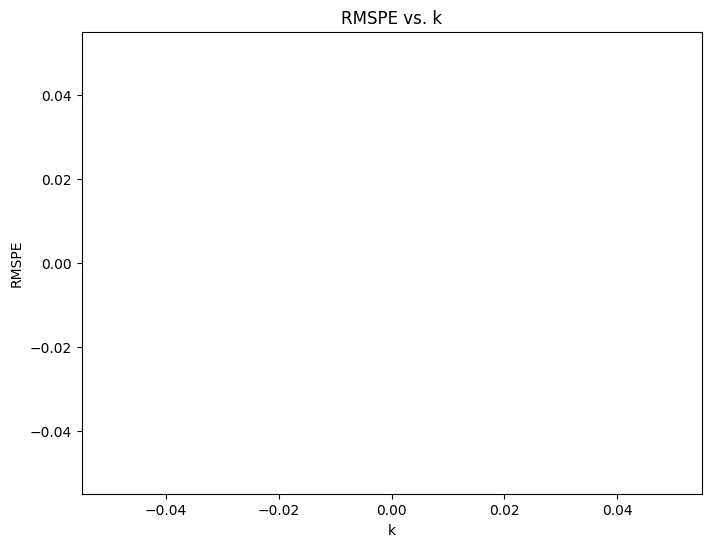

Best k:  1
Lowest RMSPE:  inf


In [43]:
# import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

def knn_regressor(X_train, X_test, y_train, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Assuming you have defined X_train, X_test, y_train somewhere in your code

# Use knn_regressor function to train the model with a specific k value
k_value = 5  # You can choose any k value
knn = knn_regressor(X_train, X_test, y_train, k_value)

# Evaluate the model with rmspe
def rmspe(y_true, y_pred):
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return rmspe

y_pred = knn.predict(X_test)
rmspe_knn = rmspe(y_test, y_pred)
print('RMSPE: ', rmspe_knn)

# Use knn_regressor function to train the model with different k values and plot the rmspe
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
rmspe_values = []

for k in k_values:
    knn = knn_regressor(X_train, X_test, y_train, k)
    y_pred = knn.predict(X_test)
    rmspe_knn = rmspe(y_test, y_pred)
    rmspe_values.append(rmspe_knn)

plt.figure(figsize=(8, 6))
plt.plot(k_values, rmspe_values, marker='o', linestyle='--', color='b')
plt.title('RMSPE vs. k')
plt.xlabel('k')
plt.ylabel('RMSPE')
plt.show()

# get the best k value
best_k = k_values[np.argmin(rmspe_values)]
print('Best k: ', best_k)
print('Lowest RMSPE: ', min(rmspe_values))



## RF Regressor

In [44]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    rf.fit(X_train, y_train)
    return rf

# use random_forest_regressor function to find best n_estimators, max_depth, min_samples_split, and min_samples_leaf
n_estimators = [10, 30, 50, 70]
max_depth = [10, 30, 50, 70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for m in max_depth:
        print('max_depth: ', m)
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf = random_forest_regressor(X_train, X_test, y_train, n, m, s, l)
                y_pred = rf.predict(X_test)
                rmspe_rf = rmspe(y_test, y_pred)
                rmspe_values.append(rmspe_rf)

# get the best n_estimators, max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)

n_estimators:  10
max_depth:  10
max_depth:  30
max_depth:  50
max_depth:  70


KeyboardInterrupt: 

In [ ]:
best_params = np.argmin(rmspe_values)

# get the best n_estimators, max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(min_samples_split) * len(min_samples_leaf))]
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // len(min_samples_leaf)) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[best_params % len(min_samples_leaf)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)

# get lowest rmspe value
lowest_rmspe = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe)



Best n_estimators:  50
Best max_depth:  30
Best min_samples_split:  2
Best min_samples_leaf:  4
Lowest RMSPE:  0.36668842401104024


## Decision Tree

In [ ]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regressor(X_train, X_test, y_train, max_depth, min_samples_split, min_samples_leaf):
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    return dt

# use decision_tree_regressor function to find best max_depth, min_samples_split, and min_samples_leaf

max_depth = [10, 30, 50, 70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

rmspe_values = []

for m in max_depth:
    print('max_depth: ', m)
    for s in min_samples_split:
        for l in min_samples_leaf:
            dt = decision_tree_regressor(X_train, X_test, y_train, m, s, l)
            y_pred = dt.predict(X_test)
            rmspe_dt = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_dt)

# get the best max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // len(min_samples_leaf)) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[best_params % len(min_samples_leaf)]

print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)

# get lowest rmspe value
lowest_rmspe = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe)

max_depth:  10
max_depth:  30
max_depth:  50
max_depth:  70
Best max_depth:  30
Best min_samples_split:  2
Best min_samples_leaf:  1
Lowest RMSPE:  0.9456243585732091


In [ ]:
# ada boost regressor
from sklearn.ensemble import AdaBoostRegressor

def ada_boost_regressor(X_train, X_test, y_train, n_estimators, learning_rate):
    ada = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    ada.fit(X_train, y_train)
    return ada

# use ada_boost_regressor function to find best n_estimators and learning_rate
n_estimators = [50, 100, 150, 200]
learning_rate = [0.1, 0.5, 1.0]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for l in learning_rate:
        ada = ada_boost_regressor(X_train, X_test, y_train, n, l)
        y_pred = ada.predict(X_test)
        rmspe_ada = rmspe(y_test, y_pred)
        rmspe_values.append(rmspe_ada)

# get the best n_estimators and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // len(learning_rate)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe)

n_estimators:  50
n_estimators:  100
n_estimators:  150
n_estimators:  200
Best n_estimators:  100
Best learning_rate:  0.1
Lowest RMSPE:  21.180238003571713


In [ ]:
# support vector regressor
from sklearn.svm import SVR

def svr_regressor(X_train, X_test, y_train, kernel, C, epsilon):
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X_train, y_train)
    return svr

# use svr_regressor function to find best kernel, C, and epsilon
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1, 1, 10]
epsilon = [0.1, 0.5, 1.0]

rmspe_values = []

for k in kernel:
    print('kernel: ', k)
    for c in C:
        for e in epsilon:
            svr = svr_regressor(X_train, X_test, y_train, k, c, e)
            y_pred = svr.predict(X_test)
            rmspe_svr = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_svr)

# get the best kernel, C, and epsilon
best_params = np.argmin(rmspe_values)
best_kernel = kernel[best_params // (len(C) * len(epsilon))]
best_C = C[(best_params // len(epsilon)) % len(C)]
best_epsilon = epsilon[best_params % len(epsilon)]

print('Best kernel: ', best_kernel)
print('Best C: ', best_C)
print('Best epsilon: ', best_epsilon)

# get lowest rmspe value
lowest_rmspe = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe)

kernel:  linear
kernel:  poly
kernel:  rbf
kernel:  sigmoid
Best kernel:  rbf
Best C:  1
Best epsilon:  0.1
Lowest RMSPE:  0.987820217432104


In [ ]:
# svm regressor
from sklearn.svm import LinearSVR

def linear_svr_regressor(X_train, X_test, y_train, C, epsilon):
    lsvr = LinearSVR(C=C, epsilon=epsilon)
    lsvr.fit(X_train, y_train)
    return lsvr

# use linear_svr_regressor function to find best C and epsilon

C = [0.1, 0.5, 1, 10, 20]
epsilon = [0.1, 0.5, 1.0, 1.5, 2.0]

rmspe_values = []

for c in C:
    for e in epsilon:
        lsvr = linear_svr_regressor(X_train, X_test, y_train, c, e)
        y_pred = lsvr.predict(X_test)
        rmspe_lsvr = rmspe(y_test, y_pred)
        rmspe_values.append(rmspe_lsvr)

# get the best C and epsilon
best_params = np.argmin(rmspe_values)
best_C = C[best_params // len(epsilon)]
best_epsilon = epsilon[best_params % len(epsilon)]

print('Best C: ', best_C)
print('Best epsilon: ', best_epsilon)

# get lowest rmspe value
lowest_rmspe = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

Best C:  0.5
Best epsilon:  0.1
Lowest RMSPE:  5.649536128515804


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression

def linear_regression(X_train, X_test, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr

# Use linear_regression function to train the model
lr = linear_regression(X_train, X_test, y_train)

# Evaluate the model with RMSPE
y_pred = lr.predict(X_test)
rmspe_lr = rmspe(y_test, y_pred)
print('RMSPE:', rmspe_lr)


RMSPE: 4.215848767291712


In [ ]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting_regressor(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf, learning_rate):
    gb = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, learning_rate=learning_rate, random_state=42)
    gb.fit(X_train, y_train)
    return gb

# use gradient_boosting_regressor function to find best n_estimators, max_depth, min_samples_split, min_samples_leaf, and learning_rate
n_estimators = [50, 100, 150, 200]
max_depth = [3, 5, 7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
learning_rate = [0.1, 0.5, 1.0]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for m in max_depth:
        print('max_depth: ', m)
        for s in min_samples_split:
            for l in min_samples_leaf:
                for lr in learning_rate:
                    gb = gradient_boosting_regressor(X_train, X_test, y_train, n, m, s, l, lr)
                    y_pred = gb.predict(X_test)
                    rmspe_gb = rmspe(y_test, y_pred)
                    rmspe_values.append(rmspe_gb)

# get the best n_estimators, max_depth, min_samples_split, min_samples_leaf, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(min_samples_split) * len(min_samples_leaf) * len(learning_rate))]
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf) * len(learning_rate))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // (len(min_samples_leaf) * len(learning_rate))) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[(best_params // len(learning_rate)) % len(min_samples_leaf)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe)


n_estimators:  50
max_depth:  3
max_depth:  5
max_depth:  7
n_estimators:  100
max_depth:  3
max_depth:  5
max_depth:  7
n_estimators:  150
max_depth:  3
max_depth:  5
max_depth:  7
n_estimators:  200
max_depth:  3
max_depth:  5
max_depth:  7
Best n_estimators:  50
Best max_depth:  7
Best min_samples_split:  2
Best min_samples_leaf:  1
Best learning_rate:  0.1
Lowest RMSPE:  0.5073118972010896
